In [112]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import csv as csv

# /Users/hayatoyamaguchi/Public/kaggle/House Price/house-prices-advanced-regression-techniques

path = "house-prices-advanced-regression-techniques/"
train_df = pd.read_csv(path+"train.csv", header=0)
test_df = pd.read_csv(path+"test.csv", header=0)
train_df['WhatIsData'] = 'Train'
test_df['WhatIsData'] = 'Test'
train_df.tail()

for i in range(1,10):
    train_df["OverallQual"+str(i)] = 0
    train_df.loc[train_df["OverallQual"]==i,"OverallQual"+str(i)] = 1
    test_df["OverallQual"+str(i)] = 0
    test_df.loc[test_df["OverallQual"]==i,"OverallQual"+str(i)] = 1
test_df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,WhatIsData,OverallQual1,OverallQual2,OverallQual3,OverallQual4,OverallQual5,OverallQual6,OverallQual7,OverallQual8,OverallQual9
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,Test,0,0,0,1,0,0,0,0,0
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,Test,0,0,0,1,0,0,0,0,0
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,Test,0,0,0,0,1,0,0,0,0
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,Test,0,0,0,0,1,0,0,0,0
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,Test,0,0,0,0,0,0,1,0,0


In [113]:
drop_train_df = train_df.drop('SalePrice',axis=1)
allData = pd.concat([drop_train_df,test_df],axis=0)
allData['TotalSF'] = allData['TotalBsmtSF'] + allData['1stFlrSF'] + allData['2ndFlrSF']

allData["LotFrontage"] = allData.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
na_col_list = allData.isnull().sum()[allData.isnull().sum()>0].sort_values(ascending=False).index.tolist()
for row in na_col_list:
    if allData[row].dtypes == "float64":
        allData[row][allData[row].isnull()] = 0
    else:
        allData[row][allData[row].isnull()] = "NA"

dropData = allData[allData.columns[allData.columns != "WhatIsData"]]

data_dummies = pd.get_dummies(dropData)
transdropData = pd.concat([dropData,data_dummies],axis=1)

transdropData = transdropData.select_dtypes(include=["float64","int64","uint8"])
transdropData = transdropData.astype('int')
a = transdropData.select_dtypes(include="object")

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns = transdropData.columns.values
transdropData_scaled = pd.DataFrame(scaler.fit(transdropData).transform(transdropData),columns=columns)

# transAllData = pd.concat([transdropData_scaled,allData["WhatIsData"]],axis=1)

transdropData_scaled["WhatIsData"] = list(allData["WhatIsData"])
transAllData = transdropData_scaled

from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(train_df["SalePrice"])


transAllData2 = transAllData.loc[:,~transAllData.columns.duplicated()]

X_train = transAllData2[transAllData2['WhatIsData']=='Train'].drop(['WhatIsData','Id'], axis=1)
y_train = np.log(train_df["SalePrice"])
X_test = transAllData2[transAllData2['WhatIsData']=='Test'].drop(['WhatIsData','Id'], axis=1)

X_train["Interaction"] = X_train["TotalSF"]*X_train["OverallQual"]
X_test["Interaction"] = X_test["TotalSF"]*X_test["OverallQual"]

# train_df = train_df.drop(columns = "OverallQual")
# test_df = test_df.drop(columns = "OverallQual")
# X_train = X_train.drop(columns="OverallQual")
# X_test = X_test.drop(columns="OverallQual")

print(X_train.shape)
X_test.head()

/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


(1460, 322)


/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Interaction
1460,-0.873616,0.482302,0.184371,-0.772552,0.391237,-0.340510,-1.113625,-0.567016,0.058675,0.558290,...,-0.298629,-0.049029,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693,0.737455
1461,-0.873616,0.528391,0.519791,-0.063185,0.391237,-0.439565,-1.257229,0.036930,1.057516,-0.293025,...,-0.298629,-0.049029,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693,-0.008690
1462,0.067331,0.205767,0.464374,-0.772552,-0.507284,0.848148,0.657493,-0.567016,0.767742,-0.293025,...,-0.298629,-0.049029,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693,-0.009419
1463,0.067331,0.390124,-0.024109,-0.063185,0.391237,0.881166,0.657493,-0.455174,0.352839,-0.293025,...,-0.298629,-0.049029,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693,0.001347
1464,1.478753,-1.222997,-0.654748,1.355551,-0.507284,0.683057,0.370284,-0.567016,-0.391353,-0.293025,...,-0.298629,-0.049029,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693,0.021574


In [114]:
Xmat = X_train
Xmat['SalePrice'] = y_train
Xmat = Xmat.drop(Xmat[(Xmat['TotalSF']>5) & (Xmat['SalePrice']<12.5)].index)
Xmat = Xmat.drop(Xmat[(Xmat['GrLivArea']>5) & (Xmat['SalePrice']<13)].index)

# recover
y_train = Xmat['SalePrice']
X_train = Xmat.drop(['SalePrice'], axis=1)

In [115]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# import seaborn as sns
# from sklearn.ensemble import RandomForestRegressor
# rf = RandomForestRegressor(n_estimators=80, max_features='auto')
# rf.fit(X_train, y_train)
# print('Training done using Random Forest')

# from pylab import rcParams

# rcParams['figure.figsize'] = 20,200

# ranking = np.argsort(-rf.feature_importances_)

# X_train = X_train.iloc[:,ranking[:37]]
# X_test = X_test.iloc[:,ranking[:37]]

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=80, max_features='auto')
rf.fit(X_train, y_train)
print('Training done using Random Forest')

ranking = np.argsort(-rf.feature_importances_)

# X_train = X_train.iloc[:,ranking[:40]]
# X_test = X_test.iloc[:,ranking[:40]]

# from pylab import rcParams

# rcParams['figure.figsize'] = 20,30

# # ranking = np.argsort(-rf.feature_importances_)
# # f, ax = plt.subplots(figsize=(11, 20))
# sns.barplot(x=rf.feature_importances_[ranking[:51]], y=X_train.columns.values[ranking[:51]], orient='h')
# ax.set_xlabel("feature importance")
# plt.tight_layout()
# plt.show()
X_test.head()


Training done using Random Forest


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Interaction
1460,-0.873616,0.482302,0.184371,-0.772552,0.391237,-0.340510,-1.113625,-0.567016,0.058675,0.558290,...,-0.298629,-0.049029,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693,0.737455
1461,-0.873616,0.528391,0.519791,-0.063185,0.391237,-0.439565,-1.257229,0.036930,1.057516,-0.293025,...,-0.298629,-0.049029,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693,-0.008690
1462,0.067331,0.205767,0.464374,-0.772552,-0.507284,0.848148,0.657493,-0.567016,0.767742,-0.293025,...,-0.298629,-0.049029,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693,-0.009419
1463,0.067331,0.390124,-0.024109,-0.063185,0.391237,0.881166,0.657493,-0.455174,0.352839,-0.293025,...,-0.298629,-0.049029,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693,0.001347
1464,1.478753,-1.222997,-0.654748,1.355551,-0.507284,0.683057,0.370284,-0.567016,-0.391353,-0.293025,...,-0.298629,-0.049029,0.395018,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693,0.021574


In [95]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
param_grid = {"colsample_bytree":[0.5,0.6,0.7,0.8,0.9,1]}


# "min_child_weigh":[1,2,4,7,10]
# "colsample_bytree":[0.5,0.6,0.7,0.8,0.9,1]
# "max_depth":[3,4,5],"learning_rate":[0.03,0.1,0.3]
# "colsample_bytree":[0.5,0.6,0.7,0.8,0.9,1]

xgb = xgb.XGBRegressor(max_depth=3,learning_rate=0.1,colsample_bytree=0.6)
grid_search = GridSearchCV(xgb, param_grid)
# , scoring = "neg_mean_squared_error"
grid_search.fit(X_train,y_train)
print(grid_search.best_score_)
print(grid_search.best_params_)

results = pd.DataFrame(grid_search.cv_results_)
results

/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/xg

0.8971188069991374
{'colsample_bytree': 0.9}


/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.067173,0.006117,0.002460,0.000630,0.5,{'colsample_bytree': 0.5},0.905189,0.883790,0.891261,0.893413,0.008868,6,0.954605,0.955841,0.954243,0.954896,0.000684
1,0.075698,0.007317,0.002110,0.000077,0.6,{'colsample_bytree': 0.6},0.906852,0.885067,0.888483,0.893467,0.009567,5,0.955571,0.957190,0.955723,0.956161,0.000730
2,0.077943,0.002125,0.002211,0.000091,0.7,{'colsample_bytree': 0.7},0.910481,0.882618,0.894503,0.895867,0.011416,2,0.955130,0.955759,0.955671,0.955520,0.000278
3,0.087702,0.002668,0.002116,0.000013,0.8,{'colsample_bytree': 0.8},0.906089,0.884553,0.895040,0.895228,0.008793,3,0.955365,0.956190,0.955783,0.955779,0.000337
4,0.094655,0.004486,0.002119,0.000023,0.9,{'colsample_bytree': 0.9},0.909855,0.888372,0.893129,0.897119,0.009213,1,0.956129,0.956929,0.956828,0.956629,0.000356
5,0.101037,0.002921,0.002098,0.000041,1,{'colsample_bytree': 1},0.908623,0.880641,0.891575,0.893613,0.011514,4,0.957438,0.957126,0.956665,0.957076,0.000318


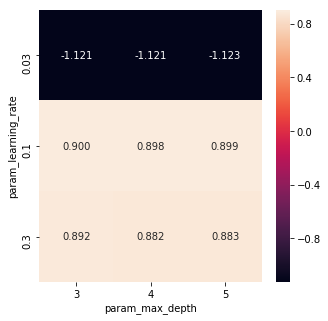

In [48]:
def plot_heatmap_from_grid(grid):
    # チューニング対象のパラメータを特定する。
    params = [k for k in grid.cv_results_.keys() if k.startswith('param_')]
    if len(params) != 2: raise Exception('grid has to have exact 2 parameters.') 

    # ヒートマップの行、列、値に使うキーを定義する。
    index = params[0]
    columns = params[1]
    values = 'mean_test_score'

    # gridから必要なキーのみを抽出する。
    df_dict = {k: grid.cv_results_[k] for k in grid.cv_results_.keys() & {index, columns, values}}
    rcParams['figure.figsize'] = 5,5
    # dictをDataFrameに変換してseabornでヒートマップを表示する。
    import pandas as pd
    df = pd.DataFrame(df_dict)
    data = df.pivot(index=index, columns=columns, values=values)
    import seaborn as sns
    sns.heatmap(data, annot=True, fmt='.3f')
plot_heatmap_from_grid(grid_search)

/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and w

/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and w

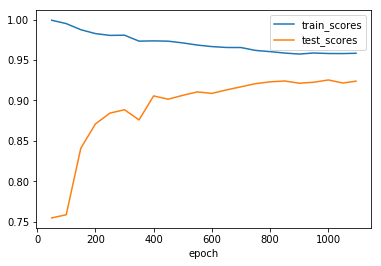

In [116]:
from sklearn.model_selection import train_test_split
X_train_train,X_val,y_train_train,y_val = train_test_split(X_train,y_train, random_state=0)
import xgboost as xgb
# epochs = [100,200,300,400,500,600,700,800,900,1000,1095]
epochs = [50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000,1050,1095]
train_scores = []
test_scores = []
for epoch in epochs:
    model = xgb.XGBRegressor(max_depth=3,learning_rate=0.1,colsample_bytree=0.9)
    X_train_epoch = X_train_train[:epoch]
    y_train_epoch = y_train_train[:epoch]
#     print(X_train_epoch.shape)
#     print(y_train_epoch.shape)
    model.fit(X_train_epoch,y_train_epoch)
#     print(forest.score(X_train_epoch,y_train_epoch))
#     print(forest.score(X_val,y_val))
    train_scores.append(model.score(X_train_epoch,y_train_epoch))
    test_scores.append(model.score(X_val,y_val))
import matplotlib.pyplot as plt
%matplotlib inline
x = epochs
y0 = train_scores
y1 = test_scores
fig = plt.figure()
plt.xlabel('epoch')
plt.plot(x, y0, label='train_scores')
plt.plot(x, y1, label='test_scores')
plt.legend()
plt.show()

In [111]:

from datetime import datetime
time= datetime.now().strftime("%Y%m%d-%H%M%S")
time
import xgboost as xgb
model = xgb.XGBRegressor(max_depth=3,learning_rate=0.1,colsample_bytree=0.6)
model.fit(X_train,y_train)
predictions = np.exp(model.predict(X_test))

df_result = pd.DataFrame()
df_result['Id'] = test_df['Id']
df_result['SalePrice'] = predictions
df_result.to_csv('result.csv'+time,index=False)
df_result.head

/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


<bound method NDFrame.head of         Id      SalePrice
0     1461  125614.562500
1     1462  161815.203125
2     1463  183258.375000
3     1464  193242.187500
4     1465  187048.984375
5     1466  168715.281250
6     1467  173171.625000
7     1468  163212.234375
8     1469  186595.375000
9     1470  122053.468750
10    1471  205280.562500
11    1472   95366.140625
12    1473  101654.296875
13    1474  162477.031250
14    1475  130411.484375
15    1476  369418.343750
16    1477  257030.296875
17    1478  277753.843750
18    1479  287802.343750
19    1480  496964.968750
20    1481  323550.031250
21    1482  195765.046875
22    1483  171755.343750
23    1484  167181.359375
24    1485  174362.625000
25    1486  201996.437500
26    1487  317383.375000
27    1488  244250.734375
28    1489  196239.828125
29    1490  199009.531250
...    ...            ...
1429  2890   77710.007812
1430  2891  135200.765625
1431  2892   47598.406250
1432  2893   73372.835938
1433  2894   38396.339844
1434  28

In [101]:
X_test.head()

1460   -0.045384
1461   -0.045384
1462   -0.045384
1463   -0.045384
1464   -0.045384
Name: Exterior1st_BrkComm, dtype: float64